In [75]:
# FETCH THE CSV DATA FROM THE API

from requests import get
import pandas as pd

base_url = "https://clinicaltrials.gov/api/query/study_fields?" # base url for our endpoint

expr = "solid tumor" # basic search term
actual_expr = expr.replace(' ', '+') # replace spaces in expr with '+'

fields = ["PrimaryOutcomeMeasure", "PrimaryOutcomeTimeFrame", "OverallStatus", "LastKnownStatus", "LastUpdatePostDate"] # fields we want to get
actual_fields = ",".join(fields) # join fields with commas

fmt = "csv" # get in csv format

num_results = 1000 # number of results we want

params = {
    "expr": actual_expr,
    "fields": actual_fields,
    "min_rnk": "1",
    "max_rnk": str(num_results),
    "fmt": fmt
}

response = get(base_url, params=params)

if response.ok:
    print("Request successful!")
else:
    print("Request failed!")
print(response.text)

Request successful!
"APIVrs: 1.01.05"
"DataVrs: 2023:03:27 01:55:10.393"
"Expression: solid+tumor"
"NStudiesAvail: 446552"
"NStudiesFound: 13020"
"MinRank: 1"
"MaxRank: 1000"
"NStudiesReturned: 1000"
"Field Names: PrimaryOutcomeMeasure,PrimaryOutcomeTimeFrame,OverallStatus,LastKnownStatus,LastUpdatePostDate"

"Rank","PrimaryOutcomeMeasure","PrimaryOutcomeTimeFrame","OverallStatus","LastKnownStatus","LastUpdatePostDate"
1,"Relief degree of tumors","The last injection","Not yet recruiting",,"February 28, 2023"
2,"Prevalence of solid tumors in RASopathies","5 years","Recruiting",,"March 9, 2023"
3,"Solid tumor biological insights","Study completion","Completed",,"June 12, 2014"
4,"Adverse Events(AE)|Objective Response Rate (ORR)|Disease Control Rate (DCR）|Duration of Response (DOR)|Progression-Free Survival (PFS)|Overall Survival (OS)","6 month|Up to 36 months|Up to 36 months|Up to 36 months|Up to 36 months|Up to 36 months","Recruiting",,"December 21, 2022"
5,"To Establish the Safety and 

In [76]:
# WRITE THE CSV DATA TO A FILE

import csv
lines = response.text.split('\n') # split by newlines

with open('output.csv', mode='w', newline='') as file: # open a file to write to
    writer = csv.writer(file, delimiter=';') # create a csv writer
    headers = ['Rank'] + fields # create headers
    writer.writerow(headers) # write headers

    for line in lines[11:]: # skip first 11 lines
        row = line.split(',\"') # split by commas followed by a quote
        
        for i,r in enumerate(row):
            row[i] = r.replace('\"', '') # remove quotes
            
        writer.writerow(row) # write row

In [86]:
# READ INTO A PANDAS DATAFRAME
df = pd.read_csv("output.csv", delimiter=';')
df

,Rank,PrimaryOutcomeMeasure,PrimaryOutcomeTimeFrame,OverallStatus,LastKnownStatus,LastUpdatePostDate
0,1,Relief degree of tumors,The last injection,"Not yet recruiting,","February 28, 2023",NaN
1,2,Prevalence of solid tumors in RASopathies,5 years,"Recruiting,","March 9, 2023",NaN
2,3,Solid tumor biological insights,Study completion,"Completed,","June 12, 2014",NaN
3,4,Adverse Events(AE)|Objective Response Rate (OR...,6 month|Up to 36 months|Up to 36 months|Up to ...,"Recruiting,","December 21, 2022",NaN
4,5,To Establish the Safety and Tolerability of Si...,Date treatment consent signed to date off stud...,"Completed,","July 26, 2021",NaN
...,...,...,...,...,...,...
996,997,Response rate|Dose limiting toxicity,Up to 2.5 years|At the end of Cycle 1 (each cy...,"Active, not recruiting,","March 15, 2023",NaN
997,998,Dose-limiting toxicity (DLT)|MTD (or recommend...,28 days|28 days,"Terminated,","December 16, 2013",NaN
998,999,Quality and quantity of adverse events due to ...,4 years,"Completed,","May 1, 2013",NaN
999,1000,Number of participants with adverse events,From the day of first dose to 30 days after la...,"Completed,","December 16, 2022",NaN


TODO:
1. Separate the individual `PrimaryOutcomeMeasure` & `PrimaryOutcomeTimeFrame` points into their own pieces of data (separated by `|` right now)
2. Any more data cleaning (ex. remove `,` from the `LastKnownStatus` column)

In [87]:
df['OverallStatus']=df['OverallStatus'].str.replace(',','')
df

,Rank,PrimaryOutcomeMeasure,PrimaryOutcomeTimeFrame,OverallStatus,LastKnownStatus,LastUpdatePostDate
0,1,Relief degree of tumors,The last injection,Not yet recruiting,"February 28, 2023",NaN
1,2,Prevalence of solid tumors in RASopathies,5 years,Recruiting,"March 9, 2023",NaN
2,3,Solid tumor biological insights,Study completion,Completed,"June 12, 2014",NaN
3,4,Adverse Events(AE)|Objective Response Rate (OR...,6 month|Up to 36 months|Up to 36 months|Up to ...,Recruiting,"December 21, 2022",NaN
4,5,To Establish the Safety and Tolerability of Si...,Date treatment consent signed to date off stud...,Completed,"July 26, 2021",NaN
...,...,...,...,...,...,...
996,997,Response rate|Dose limiting toxicity,Up to 2.5 years|At the end of Cycle 1 (each cy...,Active not recruiting,"March 15, 2023",NaN
997,998,Dose-limiting toxicity (DLT)|MTD (or recommend...,28 days|28 days,Terminated,"December 16, 2013",NaN
998,999,Quality and quantity of adverse events due to ...,4 years,Completed,"May 1, 2013",NaN
999,1000,Number of participants with adverse events,From the day of first dose to 30 days after la...,Completed,"December 16, 2022",NaN


<AxesSubplot:>

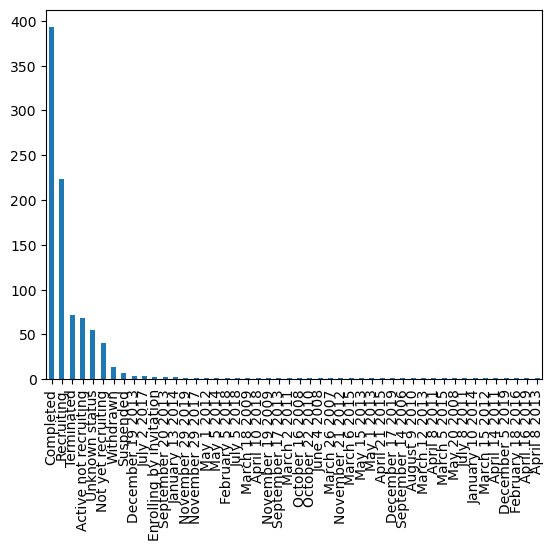

In [88]:
df.OverallStatus.value_counts().plot.bar()
# We probably should remove everything that is "Unknown Status" or random dates or other nonsense

In [91]:
# Clean up by the overallstatus column
df = df[df['OverallStatus'].isin(['Completed', 'Terminated', 'Withdrawn', 'Active, not recruiting', 'Recruiting', 'Enrolling by invitation', 'Suspended'])]

<AxesSubplot:>

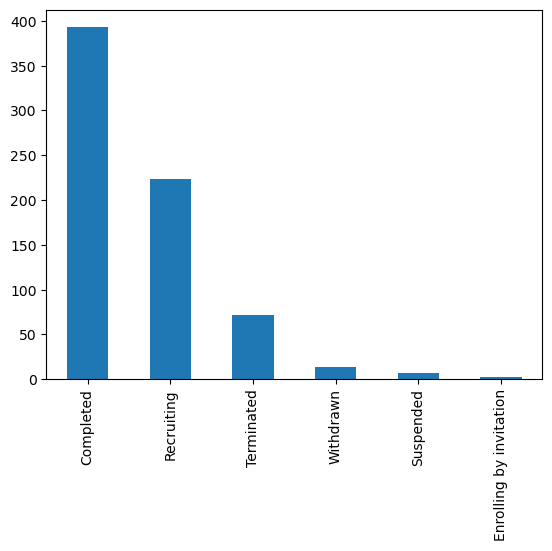

In [93]:
df.OverallStatus.value_counts().plot.bar()
# So much better